# Arboles de decisión y Random Forest

## Arboles de Decisión
* Aprendizaje supervisado.
* Ampliamente extendido.
* Diferentes algoritmos derivan de los árboles de decisión.
* Primeras versiones por Leo Breiman.
* Utilizadas para clasificación y regresión.
* Aprenden de los datos generando reglas de tipo if-else.
* Divisiones conocidas como nodos.
* Cuando un nodo no conduce a nuevas divisiones se le denomina nodo terminal o hoja.

-- **Desarrollo en el notebook primer arbol decision**

### Terminología de los arboles de decisión
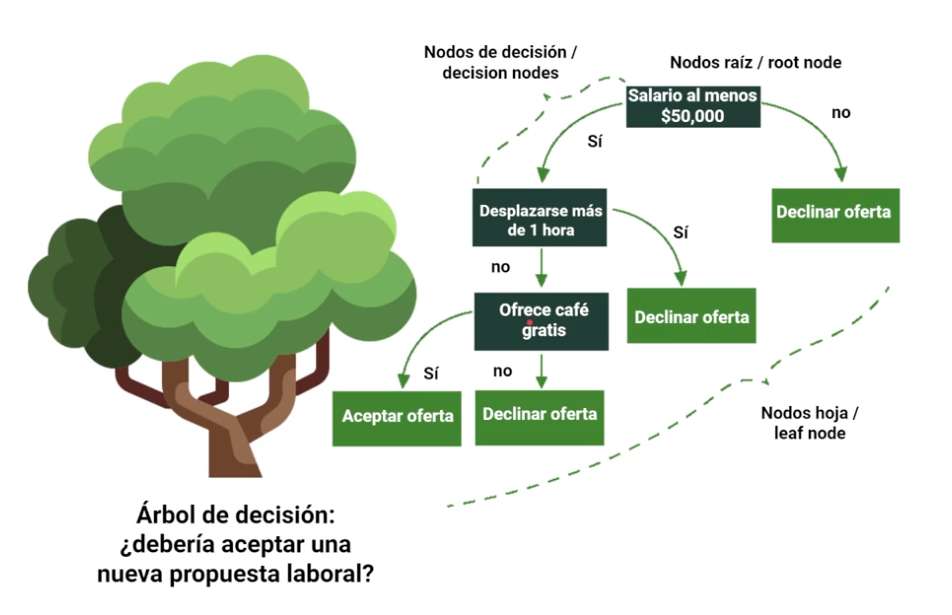   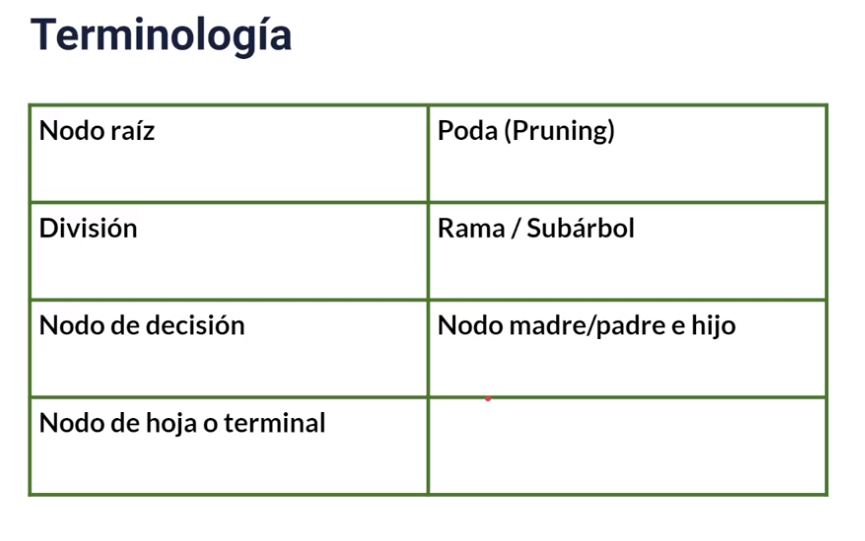

### Cómo funcionan los árboles de decisión
* https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation
* https://www.youtube.com/watch?v=ZVR2Way4nwQ&ab_channel=NormalizedNerd
* https://www.youtube.com/watch?v=sgQAhG5Q7iY&t=145s&ab_channel=NormalizedNerd

### Cuándo usar los arboles de decisión
**Ventajas**
* Algoritmos de caja blanca, por lo que es tambien facil de interpretar y de entender
* las combinaciones d elos mismos pueden dar resultados muy certeros, ej: random forest

**Desventajas**
* Con pocos datos tiende al overfitting
* Es muy sensible a outliers
* Arboles muy complejos puede que no se adapten a nuevos datos (overfitting creo)
* Para datos imbalanceados, se puede resultar en arboles sesgados

**Entonces cuando**
* Sencillo e interpretable
* Funcionan bien con gran volumen de datos
* relativamente robusto
* Útil para analizar datos cuantitativos
* Aplica para Clasifiación y Regresión

#### Xg boost Discusión

* Hola Platzinautas, les recomiendo que investiguen XGBoost un modelo regresor muy poderoso, en este ejemplo en particular obtuvo mejor desempeño que el recomendado con un accuracy un 10% superior, les comparto el código con los dos modelos para que comparen, por otro lado los valores del XGBoost están por defecto, se le pueden configurar y setear como los estimators, y mejorar aun mas.

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

df = pd.read_csv('titanic.csv')
df.drop(['Name', 'Fare'], axis=1, inplace=True)
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.rename(columns ={'Sex_male': 'Sex'}, inplace=True)
X = df.drop('Survived', axis=1)
y= df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state=0)

tree.fit(X_train,y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

model = XGBRegressor()
model.fit(X_train,y_train)
y_train_pre = model.predict(X_train)
y_test_pre = model.predict(X_test)


from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pre)
mse_test = mean_squared_error(y_test, y_test_pre)

inverted_mse_train = 1 -mse_train
inverted_mse_test = 1 -mse_test

print("Inverted MSE (Train):", inverted_mse_train)
print("Inverted MSE (Test):", inverted_mse_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(X_train)
print('El accuracy en train es: ', train_accuracy)
print('El accuracy en test es: ', test_accuracy)


importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)
sns.barplot(data, palette='bright', saturation=2.0,  linewidth=2)
plt.show()

**Caracteristicas XGBoost**

XGBoost, que significa "eXtreme Gradient Boosting", es una biblioteca de código abierto y eficiente para implementar algoritmos de boosting en árboles. Es especialmente popular en competiciones de ciencia de datos y aprendizaje automático debido a su rendimiento y capacidad para manejar conjuntos de datos grandes y complejos.

Aquí hay algunas características clave de XGBoost:

Gradient Boosting: XGBoost sigue el enfoque de boosting, que implica combinar múltiples modelos débiles (en este caso, árboles de decisión) para formar un modelo más fuerte.
Regularización: XGBoost incorpora técnicas de regularización para evitar sobreajuste y mejorar la generalización del modelo.
Manejo de valores perdidos: XGBoost puede manejar valores perdidos en los datos de entrada, evitando la necesidad de imputación previa.
Funciones de pérdida personalizadas: Permite a los usuarios definir y utilizar sus propias funciones de pérdida para adaptarse a problemas específicos.
Paralelización y Optimización: XGBoost está diseñado para ser eficiente y escalable, aprovechando la paralelización y la optimización de recursos.
Soporte para múltiples lenguajes de programación: Aunque XGBoost está implementado en C++, ofrece interfaces para varios lenguajes, incluidos Python, R, Java y Scala.
Para utilizar XGBoost en Python, por ejemplo, puedes instalar la biblioteca usando pip:

bash codepip install xgboost

Luego, puedes importar y usar la biblioteca en tu código de la siguiente manera:

pythonCopy codeimport xgboost as xgb

* Crear un clasificador XGBoost model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

* Entrenar el modelo model.fit(X_train, y_train)

* Hacer predicciones predictions = model.predict(X_test)

Este es solo un ejemplo básico, y XGBoost también se puede utilizar para problemas de regresión y otros escenarios. Además, puedes ajustar muchos hiperparámetros para optimizar el rendimiento del modelo en tu conjunto de datos específico.

## Proyecto Práctico Arboles de decisión
* En su respectivo notebook

## Random Forest
**¿Qué es?**
* Es un ensamble de machine learning que se basa en la combiniación de multiples arboles de decisión

**Pero ¿Qué es un ensamble?**
* Tambien conocidos como métodos combinados
* Intenta ayudar a mejorar el **rendimimento** de los modelos de machine Learning 
* **Es** el proceso mediante el cual se construten estrategicamente varios modelos de machine learning para resolver un problema particular.

### Primer Random forest
* En su respectivo notebook

### Cómo funciona Random Forest
Uno de los problemas de los arboles de decisión es que si les dabamos mucha profundidad tendían a sobreajustarse, una solucion es crear muchos arboles y combinarlos.
* Un parametro fundamental ahora es cuántos arboles se van a generar

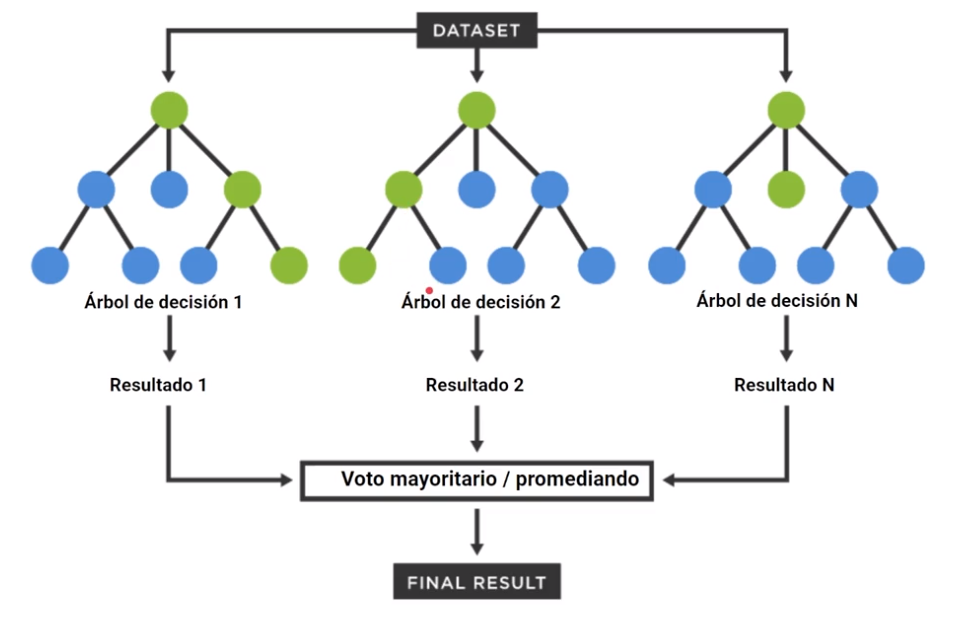

### ¿Cuándo utilizarlos?
**Ventajas**
* funciona muy bien incluso sin hacer ajuste de hiperparametros
* al utilizar multiples arboles se reduce el riesgo de overfitting
* Suele mantenerse estable frente a nuevas muestras de datos

**Desventajas**
* es mmucho mas costoso computacionalmente
* Necesitan datasets mas grandes
* No es tan facil de interpretar como un arbol de decision

**Cuando usarlo**
* rapido y facil de aplicar
* Ofrece multiples tecnicas para el ajuste de hiperparametros
* Util para clasificacion y regresion
* Util para grandes volumenes de datos
* evita el overfitting por medio de algoritmos de ensamble.

### Diferencia del random forest y el bagging
* El random forest es una extension del bagging, pero con la adición de la aleatoriedad en la selección de las características para la construcción de los arboles.
* El bagging se centra en el muestreo bootstrap, mientra que el random forest incorpora una mayor aleatoriedad para reducir la correlación entre los arboles y aumentar la robustez del modelo de ensamble.


**Nota:** 
Un random forest es un meta estimador que ajusta una serie de clasificadores de árboles de decisión en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste. El tamaño de la submuestra se controla con el parámetro max_samples si bootstrap=True (el cual es predeterminado); de lo contrario, se usa todo el conjunto de datos para construir cada árbol.

El numero de estimadores(n_estimators) no debe superar 10 ya que nuestro dataset no es muy grande.

## Proyecto:
**clasificación de ingresos**: https://archive.ics.uci.edu/dataset/20/census+income